<a href="https://colab.research.google.com/github/Blockchain-Framework/bitcoin-anomaly-analysis/blob/develop/Notebooks/Bitcoin_feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/bitcoin_final_label_dataset.csv")

In [4]:
dataset.shape

(45010, 74)

In [4]:
dataset.drop_duplicates(inplace=True)

In [ ]:
dataset.shape

(45010, 74)

In [ ]:
dataset.columns

Index(['account', 'input_value_mean', 'input_value_median',
       'input_value_variance', 'input_value_maximum', 'input_value_minimum',
       'input_value_skewness', 'input_value_kurtosis',
       'input_value_25th_percentile', 'input_value_75th_percentile',
       'input_value_range', 'input_value_usd_mean', 'input_value_usd_median',
       'input_value_usd_variance', 'input_value_usd_maximum',
       'input_value_usd_minimum', 'input_value_usd_skewness',
       'input_value_usd_kurtosis', 'input_value_usd_25th_percentile',
       'input_value_usd_75th_percentile', 'input_value_usd_range',
       'input_spending_value_usd_mean', 'input_spending_value_usd_median',
       'input_spending_value_usd_variance', 'input_spending_value_usd_maximum',
       'input_spending_value_usd_minimum', 'input_spending_value_usd_skewness',
       'input_spending_value_usd_kurtosis',
       'input_spending_value_usd_25th_percentile',
       'input_spending_value_usd_75th_percentile',
       'input_spend

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [6]:
df =  dataset.copy()

In [7]:
df = df.fillna(0)

In [8]:
X = df.drop(['label', 'account'], axis=1)  # Features
y = df['label']  # Target

X_train_strat, X_test_strat, y_train_strat, y_test_strat = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
columns_input_value = ['input_value_mean', 'input_value_median',
       'input_value_maximum', 'input_value_minimum',
       'input_value_25th_percentile', 'input_value_75th_percentile',
       'input_value_range']

In [10]:
columns_input_value_usd = ['input_value_usd_mean', 'input_value_usd_median', 'input_value_usd_maximum',
       'input_value_usd_minimum', 'input_value_usd_25th_percentile',
       'input_value_usd_75th_percentile', 'input_value_usd_range']

In [11]:
columns_input_spending_value = [
       'input_spending_value_usd_mean', 'input_spending_value_usd_median',
       'input_spending_value_usd_maximum',
       'input_spending_value_usd_minimum',
       'input_spending_value_usd_25th_percentile',
       'input_spending_value_usd_75th_percentile',
       'input_spending_value_usd_range']

In [12]:
columns_input_time = ['input_time_diff_mean',
       'input_time_diff_median',
       'input_time_diff_maximum', 'input_time_diff_minimum',
       'input_time_diff_25th_percentile', 'input_time_diff_75th_percentile',
       'input_time_diff_range']

In [13]:
columns_output_value = ['output_value_mean',
       'output_value_median', 'output_value_maximum',
       'output_value_minimum','output_value_25th_percentile',
       'output_value_75th_percentile', 'output_value_range']

In [14]:
columns_output_usd = ['output_value_usd_mean', 'output_value_usd_median', 'output_value_usd_maximum',
       'output_value_usd_minimum', 'output_value_usd_25th_percentile',
       'output_value_usd_75th_percentile', 'output_value_usd_range']

In [18]:
columns_output_time = [ 'output_time_diff_mean', 'output_time_diff_median',
       'output_time_diff_maximum',
       'output_time_diff_minimum','output_time_diff_25th_percentile',
       'output_time_diff_75th_percentile', 'output_time_diff_range']

In [15]:
columns_common = ['input_transaction_count',
       'output_transaction_count']

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc

def model_train(x_train, y_train, x_test, y_test):
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(x_train)
  X_test_scaled = scaler.transform(x_test)

  model = RandomForestClassifier(max_depth=20, n_estimators=200)

  model.fit(X_train_scaled, y_train)

  y_pred_test = model.predict(X_test_scaled)
  print(f"Test Accuracy: {accuracy_score(y_test, y_pred_test)}")

  f1 = f1_score(y_test, y_pred_test, average='weighted')
  print(f"Ensemble F1 score: {f1}")

  feature_importances = model.feature_importances_
  feature_names = x_train.columns
  importances = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
  importances = importances.sort_values(by='Importance', ascending=False)

  # Print feature importances
  print("Feature Importances:")
  print(importances)

  return accuracy_score(y_test, y_pred_test)



In [ ]:
X_train_strat_part = X_train_strat[]

,input_value_mean,input_value_median,input_value_variance,input_value_maximum,input_value_minimum,input_value_skewness,input_value_kurtosis,input_value_25th_percentile,input_value_75th_percentile,input_value_range,...,output_time_diff_median,output_time_diff_variance,output_time_diff_maximum,output_time_diff_minimum,output_time_diff_skewness,output_time_diff_kurtosis,output_time_diff_25th_percentile,output_time_diff_75th_percentile,output_time_diff_range,output_transaction_count
2933,3722454.0,3916474.0,8.523169e+12,8763661.0,154618.0,0.626634,0.126972,1563721.0,5047491.5,8609043.0,...,170480.0,9.853412e+10,989984.0,0.0,1.781344,3.774726,0.0,361648.0,989984.0,9.0
41766,855395.0,855395.0,NaN,855395.0,855395.0,NaN,NaN,855395.0,855395.0,0.0,...,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,1.0
38415,6499550.0,6499550.0,NaN,6499550.0,6499550.0,NaN,NaN,6499550.0,6499550.0,0.0,...,0.0,0.000000e+00,0.0,0.0,0.000000,NaN,0.0,0.0,0.0,3.0
16016,121847021.0,121847021.0,NaN,121847021.0,121847021.0,NaN,NaN,121847021.0,121847021.0,0.0,...,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,1.0
25461,21029873.0,21029873.0,NaN,21029873.0,21029873.0,NaN,NaN,21029873.0,21029873.0,0.0,...,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,1.0


In [ ]:
columns = columns_common + columns_input_value+ columns_input_time + columns_output_value + columns_output_usd + columns_output_time
X_train_strat_part = X_train_strat[columns]
X_test_strat_part = X_test_strat[columns]

model_train(X_train_strat_part, y_train_strat, X_test_strat_part, y_test_strat)

Test Accuracy: 0.6473005998666963
Ensemble F1 score: 0.6437988281316782
Feature Importances:
                             Feature  Importance
19              output_value_minimum    0.043792
26          output_value_usd_maximum    0.041906
23             output_value_usd_mean    0.040677
31  output_value_usd_75th_percentile    0.040511
27          output_value_usd_minimum    0.040264
24           output_value_usd_median    0.039407
30  output_value_usd_25th_percentile    0.039090
5                input_value_minimum    0.037779
21      output_value_75th_percentile    0.037058
20      output_value_25th_percentile    0.035116
18              output_value_maximum    0.034806
16                 output_value_mean    0.033635
17               output_value_median    0.033493
7        input_value_75th_percentile    0.032177
4                input_value_maximum    0.031964
3                 input_value_median    0.031514
6        input_value_25th_percentile    0.030603
2                   input

In [ ]:
feature_groups = [columns_common, columns_input_value,  columns_input_value_usd, columns_input_spending_value, columns_input_time, columns_output_value, columns_output_usd, columns_output_time]

In [ ]:
import itertools

def train_model_with_feature_combinations(x_train, y_train, x_test, y_test, feature_groups, train_function):
    """
    Train models with all possible combinations of feature groups.

    :param feature_groups: List of feature groups.
    :param train_function: Function to train the model. It should accept a list of features.
    :return: Dictionary with combination of features as keys and model performance as values.
    """
    n = len(feature_groups)

    # Generate all possible non-empty combinations of feature groups
    for r in range(1, n + 1):
        for combination in itertools.combinations(feature_groups, r):
            # Flatten the combination to a single list of features
            combined_features = [feature for group in combination for feature in group]

            X_train_part = X_train_strat[combined_features]
            X_test_part = X_test_strat[combined_features]

            # Train the model with the combined features
            model_performance = train_function(X_train_part, y_train, X_test_part, y_test)

            print("\n\n")



In [ ]:
Test Accuracy: 0.663074872250611
Ensemble F1 score: 0.6600436648667607
Feature Importances:
                                     Feature  Importance
24                      output_value_minimum    0.052999
21                         output_value_mean    0.048837
22                       output_value_median    0.047930
26              output_value_75th_percentile    0.047671
25              output_value_25th_percentile    0.047589
23                      output_value_maximum    0.045599
2                    input_value_usd_maximum    0.033505
3                    input_value_usd_minimum    0.032009
9           input_spending_value_usd_maximum    0.031537
34                    output_time_diff_range    0.031531
0                       input_value_usd_mean    0.031098
11  input_spending_value_usd_25th_percentile    0.031051
30                  output_time_diff_maximum    0.030999
10          input_spending_value_usd_minimum    0.030788
5            input_value_usd_75th_percentile    0.030393
4            input_value_usd_25th_percentile    0.030117
7              input_spending_value_usd_mean    0.029628
12  input_spending_value_usd_75th_percentile    0.029389
8            input_spending_value_usd_median    0.029363
1                     input_value_usd_median    0.029188
15                    input_time_diff_median    0.028486
28                     output_time_diff_mean    0.028106
33          output_time_diff_75th_percentile    0.027458
18           input_time_diff_25th_percentile    0.025356
19           input_time_diff_75th_percentile    0.023540
27                        output_value_range    0.023492
29                   output_time_diff_median    0.023126
14                      input_time_diff_mean    0.022425
20                     input_time_diff_range    0.017670
16                   input_time_diff_maximum    0.017187
32          output_time_diff_25th_percentile    0.014639
13            input_spending_value_usd_range    0.014261
6                      input_value_usd_range    0.013032
31                  output_time_diff_minimum    0.000000
17                   input_time_diff_minimum    0.000000

In [ ]:
Test Accuracy: 0.6600755387691624
Ensemble F1 score: 0.6569101690318417
Feature Importances:
                                     Feature  Importance
17                      output_value_minimum    0.054684
18              output_value_25th_percentile    0.047581
15                       output_value_median    0.047009
16                      output_value_maximum    0.045512
19              output_value_75th_percentile    0.045345
14                         output_value_mean    0.044968
30                  output_time_diff_maximum    0.035374
23                  output_value_usd_maximum    0.033712
24                  output_value_usd_minimum    0.032893
22                   output_value_usd_median    0.032299
2           input_spending_value_usd_maximum    0.032024
26          output_value_usd_75th_percentile    0.031753
25          output_value_usd_25th_percentile    0.031455
33          output_time_diff_75th_percentile    0.031109
34                    output_time_diff_range    0.031074
3           input_spending_value_usd_minimum    0.030937
21                     output_value_usd_mean    0.030709
5   input_spending_value_usd_75th_percentile    0.029962
4   input_spending_value_usd_25th_percentile    0.029834
11           input_time_diff_25th_percentile    0.029685
1            input_spending_value_usd_median    0.029315
0              input_spending_value_usd_mean    0.028195
8                     input_time_diff_median    0.027708
28                     output_time_diff_mean    0.027372
12           input_time_diff_75th_percentile    0.023630
29                   output_time_diff_median    0.020606
20                        output_value_range    0.019199
7                       input_time_diff_mean    0.018716
9                    input_time_diff_maximum    0.018664
13                     input_time_diff_range    0.015555
27                    output_value_usd_range    0.015194
32          output_time_diff_25th_percentile    0.014004
6             input_spending_value_usd_range    0.013921
31                  output_time_diff_minimum    0.000000
10                   input_time_diff_minimum    0.000000

In [ ]:
train_model_with_feature_combinations(X_train_strat, y_train_strat, X_test_strat, y_test_strat, feature_groups, model_train)

Streaming output truncated to the last 5000 lines.
Test Accuracy: 0.6351921795156632
Ensemble F1 score: 0.6315307445311701
Feature Importances:
                            Feature  Importance
24             output_value_minimum    0.057335
9           input_value_usd_maximum    0.046413
10          input_value_usd_minimum    0.045167
12  input_value_usd_75th_percentile    0.043551
3               input_value_minimum    0.043435
7              input_value_usd_mean    0.041156
11  input_value_usd_25th_percentile    0.040983
26     output_value_75th_percentile    0.040718
8            input_value_usd_median    0.040680
22              output_value_median    0.040456
27               output_value_range    0.040353
23             output_value_maximum    0.038729
25     output_value_25th_percentile    0.038620
21                output_value_mean    0.036128
15           input_time_diff_median    0.035980
19  input_time_diff_75th_percentile    0.034554
18  input_time_diff_25th_percentile    0

In [ ]:
Test Accuracy: 0.6631859586758498
Ensemble F1 score: 0.6602087258106789
Feature Importances:
                                     Feature  Importance
5                        input_value_minimum    0.047712
7                input_value_75th_percentile    0.046678
2                           input_value_mean    0.045227
4                        input_value_maximum    0.045073
6                input_value_25th_percentile    0.044947
3                         input_value_median    0.043027
26                  output_value_usd_minimum    0.033403
28          output_value_usd_75th_percentile    0.033320
25                  output_value_usd_maximum    0.032470
11          input_spending_value_usd_maximum    0.032350
24                   output_value_usd_median    0.031976
27          output_value_usd_25th_percentile    0.031737
36                    output_time_diff_range    0.031518
13  input_spending_value_usd_25th_percentile    0.031269
12          input_spending_value_usd_minimum    0.031164
23                     output_value_usd_mean    0.030639
14  input_spending_value_usd_75th_percentile    0.030459
10           input_spending_value_usd_median    0.030056
17                    input_time_diff_median    0.029341
9              input_spending_value_usd_mean    0.027860
20           input_time_diff_25th_percentile    0.027530
32                  output_time_diff_maximum    0.027505
30                     output_time_diff_mean    0.027275
35          output_time_diff_75th_percentile    0.025953
0                    input_transaction_count    0.023512
21           input_time_diff_75th_percentile    0.021518
16                      input_time_diff_mean    0.019388
22                     input_time_diff_range    0.018091
31                   output_time_diff_median    0.017581
18                   input_time_diff_maximum    0.016711
8                          input_value_range    0.014538
15            input_spending_value_usd_range    0.013382
1                   output_transaction_count    0.013104
29                    output_value_usd_range    0.012843
34          output_time_diff_25th_percentile    0.010847
19                   input_time_diff_minimum    0.000000
33                  output_time_diff_minimum    0.000000

In [ ]:
Test Accuracy: 0.6639635636525216
Ensemble F1 score: 0.6608442087413853
Feature Importances:
                                     Feature  Importance
26                      output_value_minimum    0.054890
28              output_value_75th_percentile    0.049116
27              output_value_25th_percentile    0.047732
24                       output_value_median    0.046880
25                      output_value_maximum    0.046088
23                         output_value_mean    0.043334
4                    input_value_usd_maximum    0.033633
12          input_spending_value_usd_minimum    0.031430
36                    output_time_diff_range    0.031387
5                    input_value_usd_minimum    0.031184
7            input_value_usd_75th_percentile    0.030834
30                     output_time_diff_mean    0.030769
11          input_spending_value_usd_maximum    0.030480
13  input_spending_value_usd_25th_percentile    0.030397
14  input_spending_value_usd_75th_percentile    0.030118
10           input_spending_value_usd_median    0.029110
20           input_time_diff_25th_percentile    0.029065
6            input_value_usd_25th_percentile    0.028712
3                     input_value_usd_median    0.028545
2                       input_value_usd_mean    0.028188
32                  output_time_diff_maximum    0.028133
9              input_spending_value_usd_mean    0.027734
17                    input_time_diff_median    0.027530
35          output_time_diff_75th_percentile    0.025776
16                      input_time_diff_mean    0.023339
0                    input_transaction_count    0.021687
31                   output_time_diff_median    0.020575
21           input_time_diff_75th_percentile    0.018455
29                        output_value_range    0.015172
18                   input_time_diff_maximum    0.015104
22                     input_time_diff_range    0.014472
8                      input_value_usd_range    0.013526
1                   output_transaction_count    0.013306
34          output_time_diff_25th_percentile    0.012017
15            input_spending_value_usd_range    0.011281
19                   input_time_diff_minimum    0.000000
33                  output_time_diff_minimum    0.000000


In [ ]:
Test Accuracy: 0.6635192179515663
Ensemble F1 score: 0.6604662791343193
Feature Importances:
                                     Feature  Importance
19                      output_value_minimum    0.052579
20              output_value_25th_percentile    0.047745
18                      output_value_maximum    0.046544
21              output_value_75th_percentile    0.045043
17                       output_value_median    0.044387
16                         output_value_mean    0.044216
25                  output_value_usd_maximum    0.034424
28          output_value_usd_75th_percentile    0.033227
26                  output_value_usd_minimum    0.032456
27          output_value_usd_25th_percentile    0.031213
5           input_spending_value_usd_minimum    0.030847
23                     output_value_usd_mean    0.030632
24                   output_value_usd_median    0.030579
4           input_spending_value_usd_maximum    0.030364
32                  output_time_diff_maximum    0.030119
30                     output_time_diff_mean    0.030006
36                    output_time_diff_range    0.029478
7   input_spending_value_usd_75th_percentile    0.029422
6   input_spending_value_usd_25th_percentile    0.029197
2              input_spending_value_usd_mean    0.028604
3            input_spending_value_usd_median    0.027682
10                    input_time_diff_median    0.027506
13           input_time_diff_25th_percentile    0.025558
35          output_time_diff_75th_percentile    0.024970
14           input_time_diff_75th_percentile    0.023867
31                   output_time_diff_median    0.023736
0                    input_transaction_count    0.020113
9                       input_time_diff_mean    0.020054
22                        output_value_range    0.016512
15                     input_time_diff_range    0.015386
11                   input_time_diff_maximum    0.014404
8             input_spending_value_usd_range    0.012736
29                    output_value_usd_range    0.012420
34          output_time_diff_25th_percentile    0.012252
1                   output_transaction_count    0.011719
33                  output_time_diff_minimum    0.000000
12                   input_time_diff_minimum    0.000000

In [ ]:
Test Accuracy: 0.6609642301710731
Ensemble F1 score: 0.6579464391165423
Feature Importances:
                                     Feature  Importance
24                      output_value_minimum    0.036176
26              output_value_75th_percentile    0.034815
3                        input_value_minimum    0.032686
37                  output_time_diff_maximum    0.031776
21                         output_value_mean    0.031057
41                    output_time_diff_range    0.030548
30                  output_value_usd_maximum    0.030270
22                       output_value_median    0.029902
31                  output_value_usd_minimum    0.029624
33          output_value_usd_75th_percentile    0.029511
25              output_value_25th_percentile    0.029451
23                      output_value_maximum    0.029038
29                   output_value_usd_median    0.027906
35                     output_time_diff_mean    0.027762
9           input_spending_value_usd_maximum    0.027498
32          output_value_usd_25th_percentile    0.027447
40          output_time_diff_75th_percentile    0.027081
10          input_spending_value_usd_minimum    0.027032
5                input_value_75th_percentile    0.027024
12  input_spending_value_usd_75th_percentile    0.027009
28                     output_value_usd_mean    0.026468
8            input_spending_value_usd_median    0.026254
11  input_spending_value_usd_25th_percentile    0.026175
7              input_spending_value_usd_mean    0.025785
18           input_time_diff_25th_percentile    0.025609
2                        input_value_maximum    0.025586
0                           input_value_mean    0.025161
15                    input_time_diff_median    0.025118
4                input_value_25th_percentile    0.023697
1                         input_value_median    0.022834
14                      input_time_diff_mean    0.022787
19           input_time_diff_75th_percentile    0.020302
27                        output_value_range    0.020237
36                   output_time_diff_median    0.020055
16                   input_time_diff_maximum    0.015267
20                     input_time_diff_range    0.014913
39          output_time_diff_25th_percentile    0.011087
34                    output_value_usd_range    0.010761
6                          input_value_range    0.009371
13            input_spending_value_usd_range    0.008923
17                   input_time_diff_minimum    0.000000
38                  output_time_diff_minimum    0.000000

In [ ]:
Test Accuracy: 0.663074872250611
Ensemble F1 score: 0.6601192636776322
Feature Importances:
                                     Feature  Importance
5                        input_value_minimum    0.045132
4                        input_value_maximum    0.044124
7                input_value_75th_percentile    0.042517
2                           input_value_mean    0.041591
6                input_value_25th_percentile    0.039467
3                         input_value_median    0.036866
37                     output_time_diff_mean    0.031840
43                    output_time_diff_range    0.029389
39                  output_time_diff_maximum    0.028368
27           input_time_diff_25th_percentile    0.026803
18          input_spending_value_usd_maximum    0.026050
19          input_spending_value_usd_minimum    0.025299
21  input_spending_value_usd_75th_percentile    0.025237
24                    input_time_diff_median    0.025123
20  input_spending_value_usd_25th_percentile    0.024871
17           input_spending_value_usd_median    0.024613
33                  output_value_usd_minimum    0.024142
42          output_time_diff_75th_percentile    0.023775
35          output_value_usd_75th_percentile    0.023550
16             input_spending_value_usd_mean    0.023235
32                  output_value_usd_maximum    0.022908
31                   output_value_usd_median    0.022297
34          output_value_usd_25th_percentile    0.022193
11                   input_value_usd_maximum    0.022094
10                    input_value_usd_median    0.021590
12                   input_value_usd_minimum    0.021381
0                    input_transaction_count    0.021209
30                     output_value_usd_mean    0.020235
28           input_time_diff_75th_percentile    0.020193
14           input_value_usd_75th_percentile    0.019951
13           input_value_usd_25th_percentile    0.019751
9                       input_value_usd_mean    0.019453
38                   output_time_diff_median    0.018683
23                      input_time_diff_mean    0.018358
29                     input_time_diff_range    0.014865
8                          input_value_range    0.014380
25                   input_time_diff_maximum    0.013530
41          output_time_diff_25th_percentile    0.012847
1                   output_transaction_count    0.012089
36                    output_value_usd_range    0.010372
22            input_spending_value_usd_range    0.009914
15                     input_value_usd_range    0.009715
40                  output_time_diff_minimum    0.000000
26                   input_time_diff_minimum    0.000000


ALL columns

In [25]:
columns = columns_common + columns_input_value + columns_input_value_usd + columns_input_spending_value + columns_input_time + columns_output_value + columns_output_usd + columns_output_time
X_train_strat_part = X_train_strat[columns]
X_test_strat_part = X_test_strat[columns]

model_train(X_train_strat_part, y_train_strat, X_test_strat_part, y_test_strat)

Test Accuracy: 0.6631859586758498
Ensemble F1 score: 0.6600854101861511
Feature Importances:
                                     Feature  Importance
33                      output_value_minimum    0.033142
35              output_value_75th_percentile    0.030301
34              output_value_25th_percentile    0.030177
30                         output_value_mean    0.029471
5                        input_value_minimum    0.029165
50                    output_time_diff_range    0.028167
44                     output_time_diff_mean    0.027303
31                       output_value_median    0.026241
32                      output_value_maximum    0.025891
27           input_time_diff_25th_percentile    0.024541
46                  output_time_diff_maximum    0.024037
4                        input_value_maximum    0.023941
24                    input_time_diff_median    0.023906
19          input_spending_value_usd_minimum    0.023657
18          input_spending_value_usd_maximum    0.02

0.6631859586758498

With input value columns

In [24]:
columns = columns_common + columns_input_value + columns_input_time + columns_output_value + columns_output_usd + columns_output_time
X_train_strat_part = X_train_strat[columns]
X_test_strat_part = X_test_strat[columns]

model_train(X_train_strat_part, y_train_strat, X_test_strat_part, y_test_strat)

Test Accuracy: 0.6457453899133526
Ensemble F1 score: 0.6423146575694061
Feature Importances:
                             Feature  Importance
19              output_value_minimum    0.045325
25          output_value_usd_maximum    0.043793
28  output_value_usd_75th_percentile    0.042082
26          output_value_usd_minimum    0.040421
27  output_value_usd_25th_percentile    0.040078
24           output_value_usd_median    0.039947
23             output_value_usd_mean    0.039659
21      output_value_75th_percentile    0.039250
5                input_value_minimum    0.038030
16                 output_value_mean    0.035154
17               output_value_median    0.035149
18              output_value_maximum    0.034505
20      output_value_25th_percentile    0.033036
3                 input_value_median    0.031762
7        input_value_75th_percentile    0.031073
4                input_value_maximum    0.030726
32          output_time_diff_maximum    0.030208
6        input_value_25th

0.6457453899133526

With input value usd columns

In [23]:
columns = columns_common + columns_input_value_usd + columns_input_time + columns_output_value + columns_output_usd + columns_output_time
X_train_strat_part = X_train_strat[columns]
X_test_strat_part = X_test_strat[columns]

model_train(X_train_strat_part, y_train_strat, X_test_strat_part, y_test_strat)

Test Accuracy: 0.6446345256609642
Ensemble F1 score: 0.6411240083363648
Feature Importances:
                             Feature  Importance
19              output_value_minimum    0.060781
16                 output_value_mean    0.051987
21      output_value_75th_percentile    0.051362
17               output_value_median    0.050926
18              output_value_maximum    0.050368
20      output_value_25th_percentile    0.049335
32          output_time_diff_maximum    0.034211
10            input_time_diff_median    0.032111
25          output_value_usd_maximum    0.030947
28  output_value_usd_75th_percentile    0.030177
5            input_value_usd_minimum    0.029996
27  output_value_usd_25th_percentile    0.028608
4            input_value_usd_maximum    0.028428
30             output_time_diff_mean    0.028420
13   input_time_diff_25th_percentile    0.028115
23             output_value_usd_mean    0.028022
24           output_value_usd_median    0.027917
26          output_value_

0.6446345256609642

With input spending value columns

In [22]:
columns = columns_common + columns_input_spending_value + columns_input_time + columns_output_value + columns_output_usd + columns_output_time
X_train_strat_part = X_train_strat[columns]
X_test_strat_part = X_test_strat[columns]

model_train(X_train_strat_part, y_train_strat, X_test_strat_part, y_test_strat)

Test Accuracy: 0.6666296378582537
Ensemble F1 score: 0.663537132651684
Feature Importances:
                                     Feature  Importance
19                      output_value_minimum    0.051697
17                       output_value_median    0.047714
21              output_value_75th_percentile    0.047570
18                      output_value_maximum    0.045351
16                         output_value_mean    0.045293
20              output_value_25th_percentile    0.045112
36                    output_time_diff_range    0.034475
28          output_value_usd_75th_percentile    0.033487
23                     output_value_usd_mean    0.032662
25                  output_value_usd_maximum    0.032458
26                  output_value_usd_minimum    0.032232
30                     output_time_diff_mean    0.031471
4           input_spending_value_usd_maximum    0.031156
32                  output_time_diff_maximum    0.031035
27          output_value_usd_25th_percentile    0.030

0.6666296378582537

With output value columns

In [21]:
columns = columns_common + columns_input_value + columns_input_value_usd + columns_input_spending_value + columns_input_time + columns_output_value + columns_output_time
X_train_strat_part = X_train_strat[columns]
X_test_strat_part = X_test_strat[columns]

model_train(X_train_strat_part, y_train_strat, X_test_strat_part, y_test_strat)

Test Accuracy: 0.6627416129748944
Ensemble F1 score: 0.6595642126496624
Feature Importances:
                                     Feature  Importance
33                      output_value_minimum    0.037840
34              output_value_25th_percentile    0.031190
35              output_value_75th_percentile    0.031014
5                        input_value_minimum    0.030053
32                      output_value_maximum    0.029806
11                   input_value_usd_maximum    0.029718
31                       output_value_median    0.029691
30                         output_value_mean    0.029312
39                  output_time_diff_maximum    0.029109
37                     output_time_diff_mean    0.028108
12                   input_value_usd_minimum    0.028090
18          input_spending_value_usd_maximum    0.027839
14           input_value_usd_75th_percentile    0.027208
43                    output_time_diff_range    0.027068
7                input_value_75th_percentile    0.02

0.6627416129748944

With Output value usd columns

In [20]:
columns = columns_common + columns_input_value + columns_input_value_usd + columns_input_spending_value + columns_input_time + columns_output_usd + columns_output_time
X_train_strat_part = X_train_strat[columns]
X_test_strat_part = X_test_strat[columns]

model_train(X_train_strat_part, y_train_strat, X_test_strat_part, y_test_strat)

Test Accuracy: 0.6682959342368363
Ensemble F1 score: 0.6653175576744037
Feature Importances:
                                     Feature  Importance
5                        input_value_minimum    0.044298
4                        input_value_maximum    0.042510
6                input_value_25th_percentile    0.042194
7                input_value_75th_percentile    0.041349
3                         input_value_median    0.040254
2                           input_value_mean    0.037450
37                     output_time_diff_mean    0.029901
19          input_spending_value_usd_minimum    0.026559
27           input_time_diff_25th_percentile    0.026227
18          input_spending_value_usd_maximum    0.026213
43                    output_time_diff_range    0.025950
20  input_spending_value_usd_25th_percentile    0.025782
42          output_time_diff_75th_percentile    0.024957
17           input_spending_value_usd_median    0.024866
21  input_spending_value_usd_75th_percentile    0.02

0.6682959342368363

With input spending value and output value usd

In [19]:
columns = columns_common + columns_input_spending_value + columns_input_time + columns_output_usd + columns_output_time
X_train_strat_part = X_train_strat[columns]
X_test_strat_part = X_test_strat[columns]

model_train(X_train_strat_part, y_train_strat, X_test_strat_part, y_test_strat)

Test Accuracy: 0.5877582759386802
Ensemble F1 score: 0.575971449864662
Feature Importances:
                                     Feature  Importance
19                  output_value_usd_minimum    0.049037
21          output_value_usd_75th_percentile    0.046366
20          output_value_usd_25th_percentile    0.044449
23                     output_time_diff_mean    0.044362
18                  output_value_usd_maximum    0.043288
17                   output_value_usd_median    0.043177
29                    output_time_diff_range    0.043163
5           input_spending_value_usd_minimum    0.041783
28          output_time_diff_75th_percentile    0.041765
4           input_spending_value_usd_maximum    0.041230
16                     output_value_usd_mean    0.040904
10                    input_time_diff_median    0.039084
3            input_spending_value_usd_median    0.039035
25                  output_time_diff_maximum    0.038772
7   input_spending_value_usd_75th_percentile    0.038

0.5877582759386802

In [26]:
columns = columns_common + columns_input_value + columns_input_spending_value + columns_input_time + columns_output_usd + columns_output_time
X_train_strat_part = X_train_strat[columns]
X_test_strat_part = X_test_strat[columns]

model_train(X_train_strat_part, y_train_strat, X_test_strat_part, y_test_strat)

Test Accuracy: 0.6646300822039547
Ensemble F1 score: 0.6615095547937478
Feature Importances:
                                     Feature  Importance
5                        input_value_minimum    0.049685
2                           input_value_mean    0.046647
7                input_value_75th_percentile    0.045751
4                        input_value_maximum    0.045487
6                input_value_25th_percentile    0.044590
3                         input_value_median    0.041325
26                  output_value_usd_minimum    0.033970
28          output_value_usd_75th_percentile    0.033328
25                  output_value_usd_maximum    0.033161
11          input_spending_value_usd_maximum    0.033097
24                   output_value_usd_median    0.031900
27          output_value_usd_25th_percentile    0.031712
23                     output_value_usd_mean    0.031045
10           input_spending_value_usd_median    0.030667
12          input_spending_value_usd_minimum    0.03

0.6646300822039547

In [27]:
columns = columns_common + columns_input_value + columns_input_spending_value + columns_input_time + columns_output_usd + columns_output_time

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

columns_common

In [30]:
columns_common

['input_transaction_count', 'output_transaction_count']

In [35]:
df['input_transaction_count'].describe()

count     45010.000000
mean         46.668474
std        2535.396875
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max      356568.000000
Name: input_transaction_count, dtype: float64

In [38]:
columns

['input_transaction_count',
 'output_transaction_count',
 'input_value_mean',
 'input_value_median',
 'input_value_maximum',
 'input_value_minimum',
 'input_value_25th_percentile',
 'input_value_75th_percentile',
 'input_value_range',
 'input_spending_value_usd_mean',
 'input_spending_value_usd_median',
 'input_spending_value_usd_maximum',
 'input_spending_value_usd_minimum',
 'input_spending_value_usd_25th_percentile',
 'input_spending_value_usd_75th_percentile',
 'input_spending_value_usd_range',
 'input_time_diff_mean',
 'input_time_diff_median',
 'input_time_diff_maximum',
 'input_time_diff_minimum',
 'input_time_diff_25th_percentile',
 'input_time_diff_75th_percentile',
 'input_time_diff_range',
 'output_value_usd_mean',
 'output_value_usd_median',
 'output_value_usd_maximum',
 'output_value_usd_minimum',
 'output_value_usd_25th_percentile',
 'output_value_usd_75th_percentile',
 'output_value_usd_range',
 'output_time_diff_mean',
 'output_time_diff_median',
 'output_time_diff_maxi

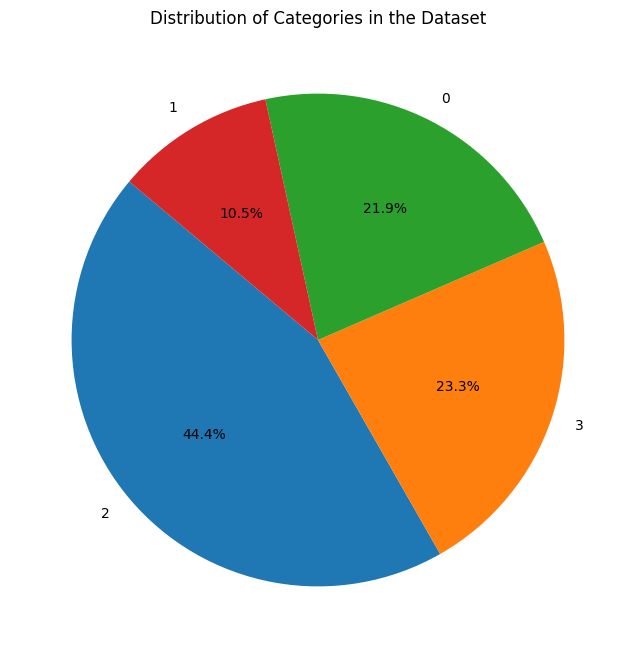

In [42]:
category_counts = df[df['input_transaction_count']<2]['label'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Categories in the Dataset')
plt.show()

In [45]:
df['total_transaction_count'] = df['input_transaction_count'] + df['output_transaction_count']

In [46]:
df['total_transaction_count'].describe()

count     45010.000000
mean         96.431993
std        5201.373266
min           1.000000
25%           2.000000
50%           2.000000
75%           5.000000
max      713651.000000
Name: total_transaction_count, dtype: float64

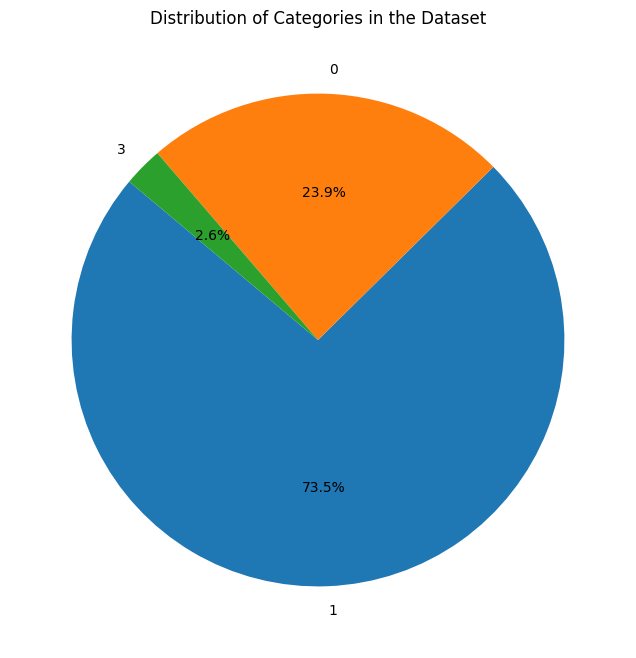

In [48]:
category_counts = df[df['total_transaction_count']>96]['label'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Categories in the Dataset')
plt.show()

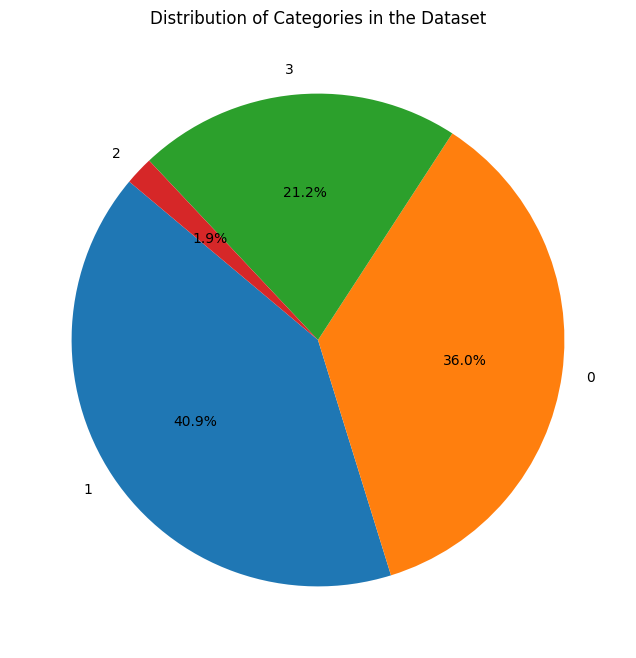

In [44]:
category_counts = df[df['output_transaction_count']>3]['label'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Categories in the Dataset')
plt.show()

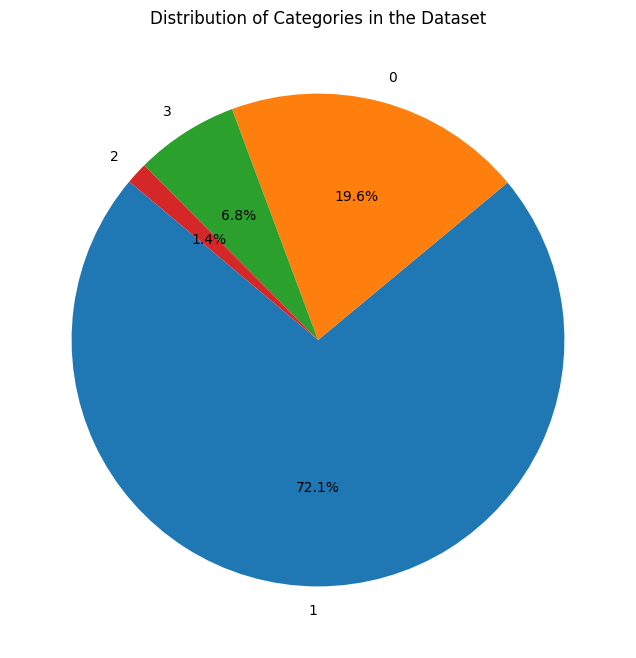

In [66]:
category_counts = df[df['input_transaction_count']==0]['label'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Categories in the Dataset')
plt.show()

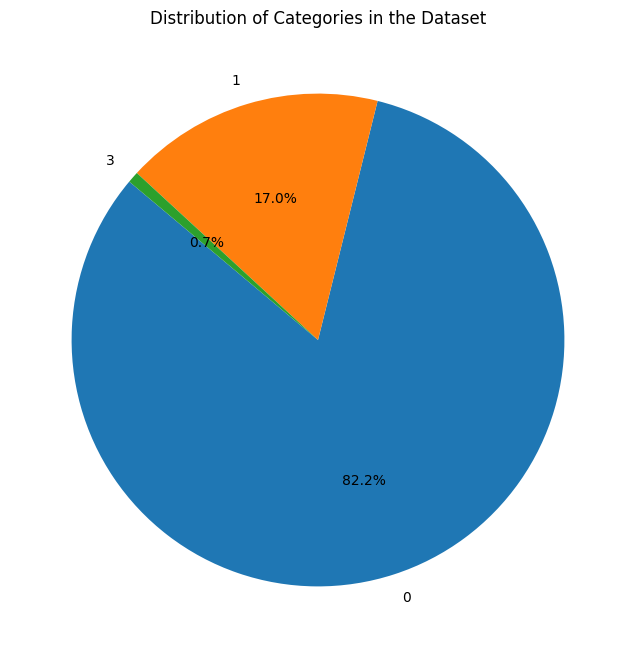

In [65]:
category_counts = df[df['output_transaction_count']==0]['label'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Categories in the Dataset')
plt.show()

In [36]:
df['output_transaction_count'].describe()

count     45010.000000
mean         49.763519
std        2668.201947
min           0.000000
25%           1.000000
50%           1.000000
75%           3.000000
max      357083.000000
Name: output_transaction_count, dtype: float64

In [49]:
df[df['label']==0]['input_transaction_count'].describe()

count    11653.000000
mean         6.840728
std         31.059863
min          0.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       1102.000000
Name: input_transaction_count, dtype: float64

In [50]:
df[df['label']==0]['output_transaction_count'].describe()

count    11653.000000
mean         7.529477
std         32.480665
min          0.000000
25%          1.000000
50%          1.000000
75%          4.000000
max       1102.000000
Name: output_transaction_count, dtype: float64

In [51]:
df[df['label']==0]['total_transaction_count'].describe()

count    11653.000000
mean        14.370205
std         63.435510
min          1.000000
25%          2.000000
50%          2.000000
75%          8.000000
max       2204.000000
Name: total_transaction_count, dtype: float64

In [56]:
df[df['label']==1]['input_transaction_count'].describe()


count      8148.000000
mean        240.494723
std        5952.928514
min           0.000000
25%           1.000000
50%           3.000000
75%          10.000000
max      356568.000000
Name: input_transaction_count, dtype: float64

In [57]:
df[df['label']==1]['output_transaction_count'].describe()

count      8148.000000
mean        255.839715
std        6264.753636
min           0.000000
25%           1.000000
50%           3.000000
75%          11.000000
max      357083.000000
Name: output_transaction_count, dtype: float64

In [58]:
df[df['label']==1]['total_transaction_count'].describe()

count      8148.000000
mean        496.334438
std       12212.448465
min           1.000000
25%           2.000000
50%           6.000000
75%          22.000000
max      713651.000000
Name: total_transaction_count, dtype: float64

In [59]:
df[df['label']==2]['input_transaction_count'].describe()

count    13861.000000
mean         1.084698
std          0.344673
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          7.000000
Name: input_transaction_count, dtype: float64

In [60]:
df[df['label']==2]['output_transaction_count'].describe()

count    13861.000000
mean         1.236202
std          0.677439
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         10.000000
Name: output_transaction_count, dtype: float64

In [61]:
df[df['label']==2]['total_transaction_count'].describe()

count    13861.000000
mean         2.320900
std          0.924285
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         16.000000
Name: total_transaction_count, dtype: float64

In [62]:
df[df['label']==3]['input_transaction_count'].describe()

count    11348.000000
mean         4.075344
std        143.957807
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max      14815.000000
Name: input_transaction_count, dtype: float64

In [63]:
df[df['label']==3]['output_transaction_count'].describe()

count    11348.000000
mean         4.441135
std        148.774294
min          0.000000
25%          1.000000
50%          1.000000
75%          3.000000
max      15163.000000
Name: output_transaction_count, dtype: float64

In [64]:
df[df['label']==3]['total_transaction_count'].describe()

count    11348.000000
mean         8.516479
std        292.685089
min          1.000000
25%          2.000000
50%          2.000000
75%          4.000000
max      29978.000000
Name: total_transaction_count, dtype: float64

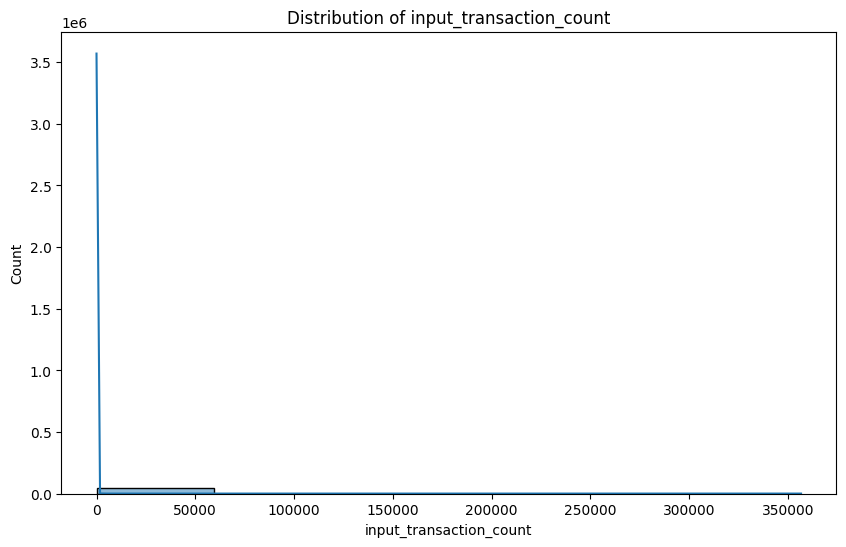

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(df['input_transaction_count'], kde=True, bins=6)
plt.title('Distribution of '+ 'input_transaction_count')
plt.show()

In [ ]:
for col in columns_common:
  plt.figure(figsize=(10, 6))
  sns.histplot(df[col], kde=True, bins=30)
  plt.title('Distribution of '+ col)
  plt.show()

Create Combined Features


In [76]:
columns = columns_common + columns_input_value + columns_input_spending_value + columns_input_time + columns_output_usd + columns_output_time + columns_output_value

In [77]:
columns

['input_transaction_count',
 'output_transaction_count',
 'input_value_mean',
 'input_value_median',
 'input_value_maximum',
 'input_value_minimum',
 'input_value_25th_percentile',
 'input_value_75th_percentile',
 'input_value_range',
 'input_spending_value_usd_mean',
 'input_spending_value_usd_median',
 'input_spending_value_usd_maximum',
 'input_spending_value_usd_minimum',
 'input_spending_value_usd_25th_percentile',
 'input_spending_value_usd_75th_percentile',
 'input_spending_value_usd_range',
 'input_time_diff_mean',
 'input_time_diff_median',
 'input_time_diff_maximum',
 'input_time_diff_minimum',
 'input_time_diff_25th_percentile',
 'input_time_diff_75th_percentile',
 'input_time_diff_range',
 'output_value_usd_mean',
 'output_value_usd_median',
 'output_value_usd_maximum',
 'output_value_usd_minimum',
 'output_value_usd_25th_percentile',
 'output_value_usd_75th_percentile',
 'output_value_usd_range',
 'output_time_diff_mean',
 'output_time_diff_median',
 'output_time_diff_maxi

In [8]:
df['total_transaction_count'] = df['input_transaction_count'] + df['output_transaction_count']

In [69]:
columns_input_value

['input_value_mean',
 'input_value_median',
 'input_value_maximum',
 'input_value_minimum',
 'input_value_25th_percentile',
 'input_value_75th_percentile',
 'input_value_range']

In [70]:
columns_output_value

['output_value_mean',
 'output_value_median',
 'output_value_maximum',
 'output_value_minimum',
 'output_value_25th_percentile',
 'output_value_75th_percentile',
 'output_value_range']

In [9]:
df['input_output_mean_ratio'] = df['input_value_mean'] / df['output_value_mean']
df['input_output_max_ratio'] = df['input_value_maximum'] / df['output_value_maximum']
df['input_output_min_ratio'] = df['input_value_minimum'] / df['output_value_minimum']
df['input_output_percentile_25_diff'] = df['input_value_25th_percentile'] - df['output_value_25th_percentile']
df['input_output_percentile_75_diff'] = df['input_value_75th_percentile'] - df['output_value_75th_percentile']
df['range_mean_ratio_input'] = df['input_value_range'] / df['input_value_mean']
df['range_mean_ratio_output'] = df['output_value_range'] / df['output_value_mean']

In [71]:
columns_input_spending_value


['input_spending_value_usd_mean',
 'input_spending_value_usd_median',
 'input_spending_value_usd_maximum',
 'input_spending_value_usd_minimum',
 'input_spending_value_usd_25th_percentile',
 'input_spending_value_usd_75th_percentile',
 'input_spending_value_usd_range']

In [72]:
columns_output_usd

['output_value_usd_mean',
 'output_value_usd_median',
 'output_value_usd_maximum',
 'output_value_usd_minimum',
 'output_value_usd_25th_percentile',
 'output_value_usd_75th_percentile',
 'output_value_usd_range']

In [10]:
df['input_output_usd_mean_ratio'] = df['input_spending_value_usd_mean'] / df['output_value_usd_mean']
df['input_output_usd_max_ratio'] = df['input_spending_value_usd_maximum'] / df['output_value_usd_maximum']
df['input_output_usd_min_ratio'] = df['input_spending_value_usd_minimum'] / df['output_value_usd_minimum']
df['input_output_usd_percentile_25_diff'] = df['input_spending_value_usd_25th_percentile'] - df['output_value_usd_25th_percentile']
df['input_output_usd_percentile_75_diff'] = df['input_spending_value_usd_75th_percentile'] - df['output_value_usd_75th_percentile']
df['input_range_mean_ratio'] = df['input_spending_value_usd_range'] / df['input_spending_value_usd_mean']
df['output_range_mean_ratio'] = df['output_value_usd_range'] / df['output_value_usd_mean']

In [11]:
df['input_output_transaction_count_ratio'] = df['input_transaction_count'] / df['output_transaction_count']
df['input_output_maximum_transaction_value_diff'] = df['input_value_maximum'] - df['output_value_maximum']
df['input_output_minimum_transaction_value_diff'] = df['input_value_minimum'] - df['output_value_minimum']
df['input_output_time_diff_mean_ratio'] = df['input_time_diff_mean'] / df['output_time_diff_mean']
df['input_output_time_diff_max_min_diff'] = df['input_time_diff_range'] - df['output_time_diff_range']
df['input_time_range_to_output_time_range_ratio'] = df['input_time_diff_range'] / df['output_time_diff_range']

In [12]:
old_columns = ['input_transaction_count',
 'output_transaction_count',
 'input_value_mean',
 'input_value_median',
 'input_value_maximum',
 'input_value_minimum',
 'input_value_25th_percentile',
 'input_value_75th_percentile',
 'input_value_range',
 'input_spending_value_usd_mean',
 'input_spending_value_usd_median',
 'input_spending_value_usd_maximum',
 'input_spending_value_usd_minimum',
 'input_spending_value_usd_25th_percentile',
 'input_spending_value_usd_75th_percentile',
 'input_spending_value_usd_range',
 'input_time_diff_mean',
 'input_time_diff_median',
 'input_time_diff_maximum',
 'input_time_diff_minimum',
 'input_time_diff_25th_percentile',
 'input_time_diff_75th_percentile',
 'input_time_diff_range',
 'output_value_usd_mean',
 'output_value_usd_median',
 'output_value_usd_maximum',
 'output_value_usd_minimum',
 'output_value_usd_25th_percentile',
 'output_value_usd_75th_percentile',
 'output_value_usd_range',
 'output_time_diff_mean',
 'output_time_diff_median',
 'output_time_diff_maximum',
 'output_time_diff_minimum',
 'output_time_diff_25th_percentile',
 'output_time_diff_75th_percentile',
 'output_time_diff_range',
 'output_value_mean',
 'output_value_median',
 'output_value_maximum',
 'output_value_minimum',
 'output_value_25th_percentile',
 'output_value_75th_percentile',
 'output_value_range',
           ]

In [13]:
new_columns = [
    'input_output_mean_ratio',
    'input_output_max_ratio',
    'input_output_min_ratio',
    'input_output_percentile_25_diff',
    'input_output_percentile_75_diff',
    'range_mean_ratio_input',
    'range_mean_ratio_output',
    'input_output_usd_mean_ratio',
    'input_output_usd_max_ratio',
    'input_output_usd_min_ratio',
    'input_output_usd_percentile_25_diff',
    'input_output_usd_percentile_75_diff',
    'input_range_mean_ratio',
    'output_range_mean_ratio',
    'input_output_transaction_count_ratio',
    'input_output_maximum_transaction_value_diff',
    'input_output_minimum_transaction_value_diff',
    'input_output_time_diff_max_min_diff'
]


In [14]:
df_1 = df.copy()
df_1 = df_1[['label'] + old_columns + new_columns]

In [31]:
df_1.columns

Index(['label', 'input_transaction_count', 'output_transaction_count',
       'input_value_mean', 'input_value_median', 'input_value_maximum',
       'input_value_minimum', 'input_value_25th_percentile',
       'input_value_75th_percentile', 'input_value_range',
       'input_spending_value_usd_mean', 'input_spending_value_usd_median',
       'input_spending_value_usd_maximum', 'input_spending_value_usd_minimum',
       'input_spending_value_usd_25th_percentile',
       'input_spending_value_usd_75th_percentile',
       'input_spending_value_usd_range', 'input_time_diff_mean',
       'input_time_diff_median', 'input_time_diff_maximum',
       'input_time_diff_minimum', 'input_time_diff_25th_percentile',
       'input_time_diff_75th_percentile', 'input_time_diff_range',
       'output_value_usd_mean', 'output_value_usd_median',
       'output_value_usd_maximum', 'output_value_usd_minimum',
       'output_value_usd_25th_percentile', 'output_value_usd_75th_percentile',
       'output_valu

In [15]:
df_1[new_columns].isnull().sum()

input_output_mean_ratio                          0
input_output_max_ratio                           0
input_output_min_ratio                           0
input_output_percentile_25_diff                  0
input_output_percentile_75_diff                  0
range_mean_ratio_input                         280
range_mean_ratio_output                        135
input_output_usd_mean_ratio                      0
input_output_usd_max_ratio                       0
input_output_usd_min_ratio                       0
input_output_usd_percentile_25_diff              0
input_output_usd_percentile_75_diff              0
input_range_mean_ratio                         280
output_range_mean_ratio                        135
input_output_transaction_count_ratio             0
input_output_maximum_transaction_value_diff      0
input_output_minimum_transaction_value_diff      0
input_output_time_diff_max_min_diff              0
dtype: int64

In [16]:
df_1.replace([np.inf, -np.inf], np.nan, inplace=True)

max_value = 1e308
df_1[df_1 > max_value] = np.nan

In [17]:
df_1[new_columns].isnull().sum()

input_output_mean_ratio                        135
input_output_max_ratio                         135
input_output_min_ratio                         136
input_output_percentile_25_diff                  0
input_output_percentile_75_diff                  0
range_mean_ratio_input                         280
range_mean_ratio_output                        135
input_output_usd_mean_ratio                    135
input_output_usd_max_ratio                     135
input_output_usd_min_ratio                     136
input_output_usd_percentile_25_diff              0
input_output_usd_percentile_75_diff              0
input_range_mean_ratio                         280
output_range_mean_ratio                        135
input_output_transaction_count_ratio           135
input_output_maximum_transaction_value_diff      0
input_output_minimum_transaction_value_diff      0
input_output_time_diff_max_min_diff              0
dtype: int64

In [19]:
df_1[new_columns].isnull().sum()

input_output_mean_ratio                        0
input_output_max_ratio                         0
input_output_min_ratio                         0
input_output_percentile_25_diff                0
input_output_percentile_75_diff                0
range_mean_ratio_input                         0
range_mean_ratio_output                        0
input_output_usd_mean_ratio                    0
input_output_usd_max_ratio                     0
input_output_usd_min_ratio                     0
input_output_usd_percentile_25_diff            0
input_output_usd_percentile_75_diff            0
input_range_mean_ratio                         0
output_range_mean_ratio                        0
input_output_transaction_count_ratio           0
input_output_maximum_transaction_value_diff    0
input_output_minimum_transaction_value_diff    0
input_output_time_diff_max_min_diff            0
dtype: int64

In [18]:
df_1.dropna(inplace=True)

In [20]:
X = df_1.drop(['label'], axis=1)
y = df_1['label']

X_train_strat, X_test_strat, y_train_strat, y_test_strat = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [115]:


model_train(X_train_strat, y_train_strat, X_test_strat, y_test_strat)

Test Accuracy: 0.6748514407444781
Ensemble F1 score: 0.6730162769246345
Feature Importances:
                                        Feature  Importance
40                         output_value_minimum    0.028527
5                           input_value_minimum    0.027723
42                 output_value_75th_percentile    0.026920
54          input_output_usd_percentile_25_diff    0.026811
41                 output_value_25th_percentile    0.026507
..                                          ...         ...
46                       input_output_min_ratio    0.000307
59  input_output_maximum_transaction_value_diff    0.000063
45                       input_output_max_ratio    0.000057
33                     output_time_diff_minimum    0.000000
19                      input_time_diff_minimum    0.000000

[62 rows x 2 columns]


0.6748514407444781

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_1)

In [117]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)  # You can adjust the degree
df_poly = poly.fit_transform(df_scaled)

In [118]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # Retain 95% of the variance
df_reduced = pca.fit_transform(df_poly)


In [120]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)  # Adjust number of clusters
df_1['cluster'] = kmeans.fit_predict(df_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [122]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and 'target_column' is the name of your target variable
X = df_1.drop('label', axis=1)  # Features
y = df_1['label']               # Target variable

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize RFE with RandomForestClassifier as the estimator
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=10)  # Adjust the number of features

# Fit RFE
rfe.fit(X_train_scaled, y_train)

# Transform the data to the selected features
X_train_rfe = rfe.transform(X_train_scaled)
X_test_rfe = rfe.transform(X_test_scaled)

# Optionally, check which features are selected
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['input_value_minimum', 'input_value_75th_percentile',
       'input_spending_value_usd_mean', 'output_value_usd_maximum',
       'output_value_usd_75th_percentile', 'output_time_diff_range',
       'output_value_mean', 'output_value_minimum',
       'output_value_75th_percentile', 'input_output_usd_percentile_25_diff'],
      dtype='object')


In [33]:
import pandas as pd

# Assuming df is your DataFrame

# Step 1: Compute the correlation matrix
corr_matrix = df_1.drop(['label'], axis=1).corr().abs()

# Step 2: Identify pairs of highly correlated features
threshold = 0.9  # Set your correlation threshold here (e.g., 0.8)
high_corr_var = set()  # Set of all the names of highly correlated variables

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] >= threshold and (corr_matrix.columns[i]!=corr_matrix.columns[j]) and  corr_matrix.columns[j] not in high_corr_var:
            colname = corr_matrix.columns[i]  # getting the name of column
            high_corr_var.add(colname)

# Step 3: Drop one of each pair of highly correlated features
df_reduced = df_1.drop(columns=high_corr_var)

print("Dropped columns:", high_corr_var)
print("Remaining columns:", df_reduced.columns)


Dropped columns: {'input_value_median', 'input_spending_value_usd_75th_percentile', 'output_range_mean_ratio', 'input_time_diff_range', 'range_mean_ratio_output', 'input_output_usd_mean_ratio', 'input_range_mean_ratio', 'output_value_maximum', 'input_output_minimum_transaction_value_diff', 'input_time_diff_25th_percentile', 'input_output_maximum_transaction_value_diff', 'output_value_usd_minimum', 'input_spending_value_usd_mean', 'input_output_usd_max_ratio', 'input_value_75th_percentile', 'output_value_range', 'output_time_diff_25th_percentile', 'input_output_usd_percentile_75_diff', 'input_spending_value_usd_range', 'output_value_median', 'output_value_75th_percentile', 'input_spending_value_usd_minimum', 'input_output_percentile_25_diff', 'input_value_25th_percentile', 'output_value_usd_median', 'output_transaction_count', 'output_value_usd_25th_percentile', 'output_value_minimum', 'output_value_usd_mean', 'output_value_25th_percentile', 'input_spending_value_usd_25th_percentile', '

In [34]:
high_corr_var

{'input_output_maximum_transaction_value_diff',
 'input_output_minimum_transaction_value_diff',
 'input_output_percentile_25_diff',
 'input_output_usd_max_ratio',
 'input_output_usd_mean_ratio',
 'input_output_usd_percentile_75_diff',
 'input_range_mean_ratio',
 'input_spending_value_usd_25th_percentile',
 'input_spending_value_usd_75th_percentile',
 'input_spending_value_usd_maximum',
 'input_spending_value_usd_mean',
 'input_spending_value_usd_median',
 'input_spending_value_usd_minimum',
 'input_spending_value_usd_range',
 'input_time_diff_25th_percentile',
 'input_time_diff_75th_percentile',
 'input_time_diff_range',
 'input_value_25th_percentile',
 'input_value_75th_percentile',
 'input_value_median',
 'output_range_mean_ratio',
 'output_time_diff_25th_percentile',
 'output_time_diff_75th_percentile',
 'output_time_diff_range',
 'output_transaction_count',
 'output_value_25th_percentile',
 'output_value_75th_percentile',
 'output_value_maximum',
 'output_value_mean',
 'output_valu

In [36]:
len(high_corr_var)

40

In [37]:
len(df_reduced.columns) - 1

22

In [28]:
corr_matrix = df_1.drop(['label'], axis=1).corr().abs()
threshold = 0.8  # Set your correlation threshold

# Data structure to store highly correlated feature pairs with their correlation values
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] >= threshold and (corr_matrix.columns[i] != corr_matrix.columns[j]):
            colname1 = corr_matrix.columns[i]
            colname2 = corr_matrix.columns[j]
            corr_value = corr_matrix.iloc[i, j]
            high_corr_pairs.append((colname1, colname2, corr_value))

# Convert the list to a DataFrame for better readability and usage
high_corr_pairs_df = pd.DataFrame(high_corr_pairs, columns=['Feature1', 'Feature2', 'Correlation'])

high_corr_pairs_df.head()  # Displaying the first few rows of the DataFrame



,Feature1,Feature2,Correlation
0,output_transaction_count,input_transaction_count,0.998289
1,input_value_median,input_value_mean,0.913071
2,input_value_maximum,input_value_mean,0.875837
3,input_value_minimum,input_value_mean,0.872657
4,input_value_minimum,input_value_median,0.955875


In [29]:
high_corr_pairs_df

,Feature1,Feature2,Correlation
0,output_transaction_count,input_transaction_count,0.998289
1,input_value_median,input_value_mean,0.913071
2,input_value_maximum,input_value_mean,0.875837
3,input_value_minimum,input_value_mean,0.872657
4,input_value_minimum,input_value_median,0.955875
...,...,...,...
273,input_output_maximum_transaction_value_diff,input_output_usd_mean_ratio,0.883114
274,input_output_maximum_transaction_value_diff,input_output_usd_max_ratio,0.914261
275,input_output_minimum_transaction_value_diff,input_output_min_ratio,0.997119
276,input_output_minimum_transaction_value_diff,input_output_percentile_25_diff,0.934647


In [32]:
 # 139 feature couples with high correlation

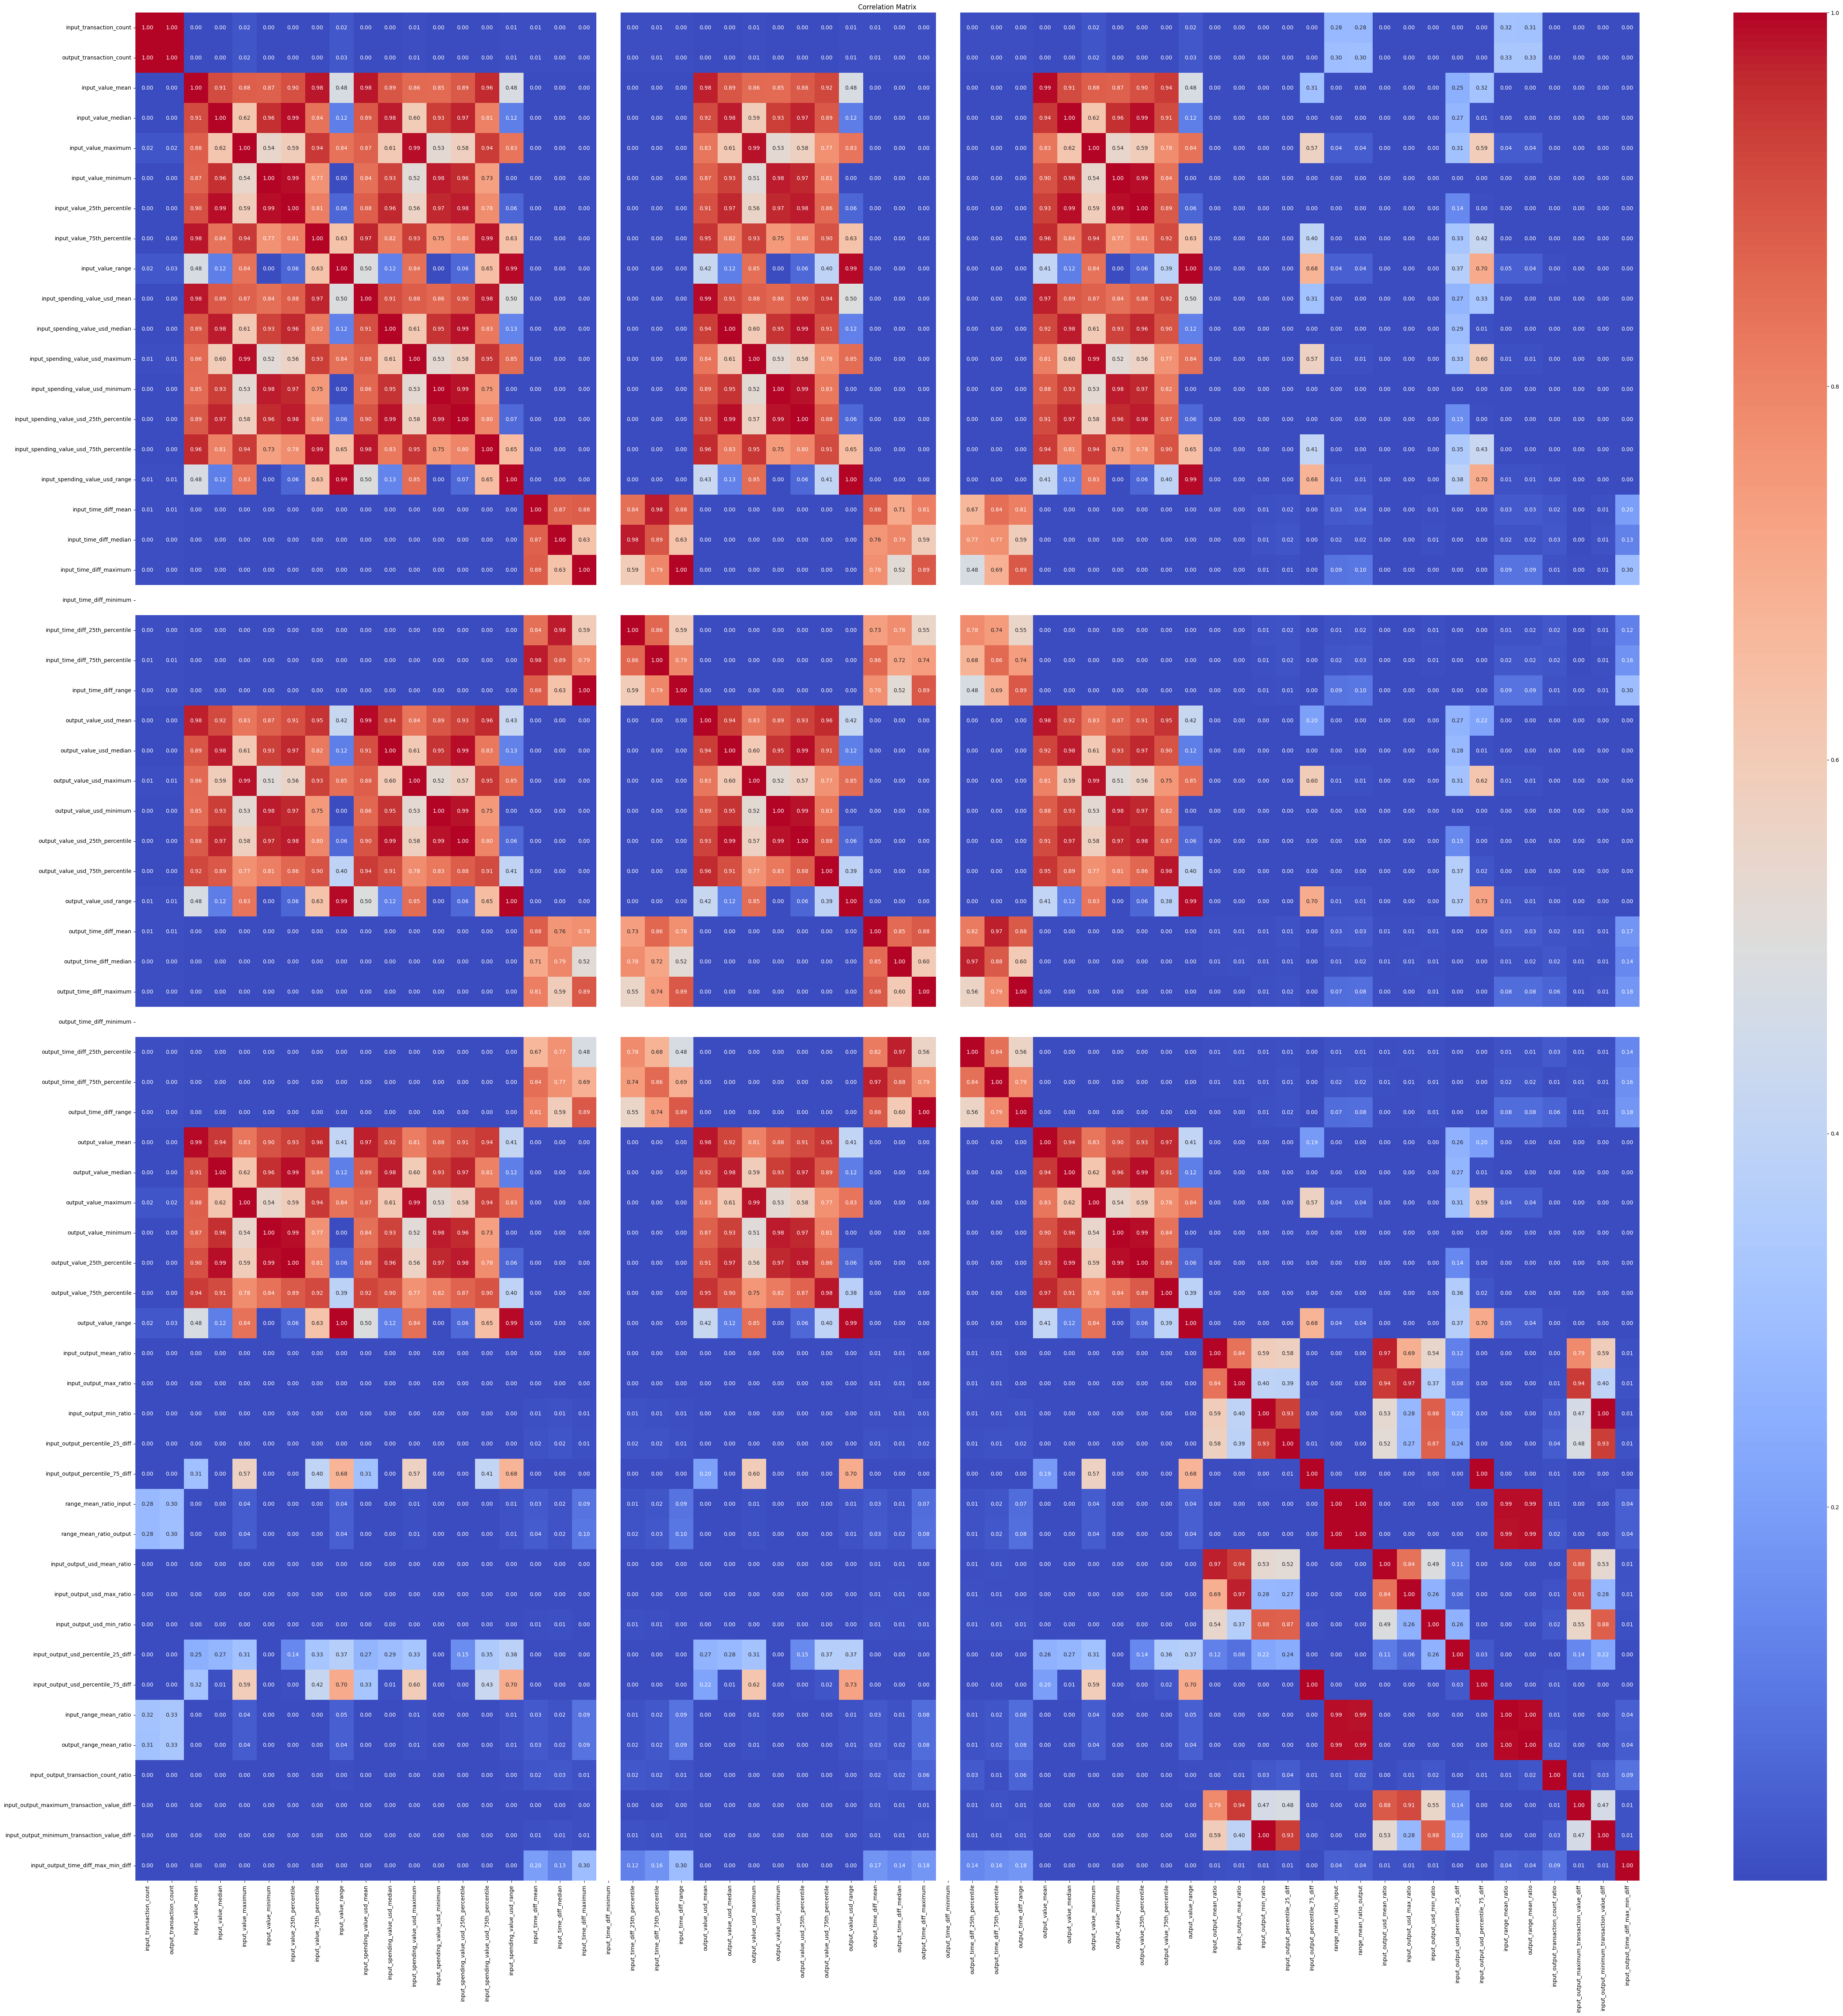

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_1 is your DataFrame and you've already computed the corr_matrix
corr_matrix = df_1.drop(['label'], axis=1).corr().abs()

# Setting plot size based on the number of features (with a maximum size limit)
num_features = len(corr_matrix.columns)
size = min(num_features, num_features)  # Limiting the size to a maximum of 20 for readability

plt.figure(figsize=(size, size))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Model training by removing high correlated features

In [43]:
columns = list(high_corr_var)

In [44]:
df_2 = df_1.drop(columns, axis=1)

In [45]:
X = df_2.drop(['label'], axis=1)  # Features
y = df_2['label']  # Target

X_train_strat, X_test_strat, y_train_strat, y_test_strat = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

model_train(X_train_strat, y_train_strat, X_test_strat, y_test_strat)

Test Accuracy: 0.6638636618454984
Ensemble F1 score: 0.6620894751629715
Feature Importances:
                                 Feature  Importance
1                       input_value_mean    0.127541
3                    input_value_minimum    0.125077
2                    input_value_maximum    0.117432
19   input_output_usd_percentile_25_diff    0.085901
11              output_time_diff_maximum    0.064259
9                  output_time_diff_mean    0.058524
18            input_output_usd_min_ratio    0.053727
6                 input_time_diff_median    0.051133
10               output_time_diff_median    0.050525
0                input_transaction_count    0.045133
5                   input_time_diff_mean    0.042663
4                      input_value_range    0.040508
17                range_mean_ratio_input    0.040016
7                input_time_diff_maximum    0.038655
21   input_output_time_diff_max_min_diff    0.038525
20  input_output_transaction_count_ratio    0.008203
13    

0.6638636618454984

In [46]:
X = df_2.drop(['label' , 'input_time_diff_minimum', 'output_time_diff_minimum'], axis=1)  # Features
y = df_2['label']  # Target

X_train_strat, X_test_strat, y_train_strat, y_test_strat = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

model_train(X_train_strat, y_train_strat, X_test_strat, y_test_strat)

Test Accuracy: 0.659827334903016
Ensemble F1 score: 0.6580034775891768
Feature Importances:
                                 Feature  Importance
3                    input_value_minimum    0.131816
1                       input_value_mean    0.128600
2                    input_value_maximum    0.112716
17   input_output_usd_percentile_25_diff    0.087455
10              output_time_diff_maximum    0.061640
8                  output_time_diff_mean    0.059083
6                 input_time_diff_median    0.058411
16            input_output_usd_min_ratio    0.054299
9                output_time_diff_median    0.046329
5                   input_time_diff_mean    0.043529
0                input_transaction_count    0.041703
19   input_output_time_diff_max_min_diff    0.039586
15                range_mean_ratio_input    0.039323
7                input_time_diff_maximum    0.038226
4                      input_value_range    0.037781
18  input_output_transaction_count_ratio    0.008287
11     

0.659827334903016

In [47]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and 'target_column' is the name of your target variable
X = df_2.drop('label', axis=1)  # Features
y = df_2['label']               # Target variable

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize RFE with RandomForestClassifier as the estimator
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=10)  # Adjust the number of features

# Fit RFE
rfe.fit(X_train_scaled, y_train)

# Transform the data to the selected features
X_train_rfe = rfe.transform(X_train_scaled)
X_test_rfe = rfe.transform(X_test_scaled)

# Optionally, check which features are selected
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['input_value_mean', 'input_value_maximum', 'input_value_minimum',
       'input_time_diff_mean', 'input_time_diff_median',
       'output_time_diff_mean', 'output_time_diff_maximum',
       'range_mean_ratio_input', 'input_output_usd_min_ratio',
       'input_output_usd_percentile_25_diff'],
      dtype='object')


In [48]:
columns = ['input_value_mean', 'input_value_maximum', 'input_value_minimum',
       'input_time_diff_mean', 'input_time_diff_median',
       'output_time_diff_mean', 'output_time_diff_maximum',
       'range_mean_ratio_input', 'input_output_usd_min_ratio',
       'input_output_usd_percentile_25_diff']

X = df_2[columns]  # Features
y = df_2['label']  # Target

X_train_strat, X_test_strat, y_train_strat, y_test_strat = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

model_train(X_train_strat, y_train_strat, X_test_strat, y_test_strat)

Test Accuracy: 0.6480547146541092
Ensemble F1 score: 0.645670643076332
Feature Importances:
                               Feature  Importance
2                  input_value_minimum    0.153576
0                     input_value_mean    0.146142
1                  input_value_maximum    0.134568
9  input_output_usd_percentile_25_diff    0.112911
6             output_time_diff_maximum    0.091160
5                output_time_diff_mean    0.079519
4               input_time_diff_median    0.076980
7               range_mean_ratio_input    0.069875
3                 input_time_diff_mean    0.068644
8           input_output_usd_min_ratio    0.066625


0.6480547146541092

In [49]:
columns = ['input_value_minimum', 'input_value_75th_percentile',
       'input_spending_value_usd_mean', 'output_value_usd_maximum',
       'output_value_usd_75th_percentile', 'output_time_diff_range',
       'output_value_mean', 'output_value_minimum',
       'output_value_75th_percentile', 'input_output_usd_percentile_25_diff']

X = df_1[columns]  # Features
y = df_1['label']  # Target

X_train_strat, X_test_strat, y_train_strat, y_test_strat = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

model_train(X_train_strat, y_train_strat, X_test_strat, y_test_strat)

Test Accuracy: 0.646485031954255
Ensemble F1 score: 0.643465246126903
Feature Importances:
                               Feature  Importance
5               output_time_diff_range    0.158982
9  input_output_usd_percentile_25_diff    0.104272
3             output_value_usd_maximum    0.102308
7                 output_value_minimum    0.098507
4     output_value_usd_75th_percentile    0.095406
8         output_value_75th_percentile    0.093145
2        input_spending_value_usd_mean    0.091551
1          input_value_75th_percentile    0.089763
0                  input_value_minimum    0.086965
6                    output_value_mean    0.079101


0.646485031954255

In [50]:
df_1.to_csv('/content/drive/MyDrive/bitcoin_feature_filtered_dataset.csv', index=False)